# Animate a Baby Robot Gym Environment

This runs a single episode from a Baby Robot Gym environment, sampling random actions and creates an animated gif to show how the episode progressed.

### Setup required libraries

In [1]:
# set the path so we can import from the root directory
import sys
sys.path.insert(0, '../')

In [2]:
import os
import numpy as np
from time import sleep

from babyrobot.envs.lib import Actions
from babyrobot.envs.lib import Direction
from babyrobot.envs.lib import GridLevel
from babyrobot.envs.lib import RobotDraw

from ipywidgets import Layout
from ipywidgets import Play, IntProgress, HBox, VBox, link

### Grid World Properties

In [3]:
cell_pixels  = 64                        # pixel dimensions of a grid square   
grid_width   = 3                         # number of horizontal cells
width_pixels = grid_width * cell_pixels  # total horizontal pixels

### Specify an image directory

As Baby Robot moves through the grid world, an image will be saved at each position. These images will then be joined together to create the animated gif.

When moving between one grid cell and the next multiple images will be written to give a smooth progression between the states.

In [5]:
image_folder = 'images/animated_env'

if not os.path.exists(image_folder):
    os.makedirs(image_folder)

# clear any existing files from the directory
filelist = [ f for f in os.listdir(image_folder) if f.endswith(".png") ]
for f in filelist:
    os.remove(os.path.join(image_folder, f))

### Define a callback function to save the view

In [6]:
# import the required environment
from babyrobot.envs import BabyRobotEnv_v3

env = BabyRobotEnv_v3()
level = env.level.draw_grid

step = 0
done = False
last_action = env.action_space.sample()
last_state = np.array([0,0])

# define a callback function to call when the canvases are changed        
# - this then saves the current view
def save_to_file(*args, **kwargs):    
    global step
    # do a save and restore to force canvas update before writing
    level.canvases[3].save()
    level.canvases[3].restore()
    level.canvases.to_file(f'{image_folder}/step_{step}.png')   
        
level.canvases.observe(save_to_file,'image_data') 
env.render()

Stay : (0,0) reward = 0


MultiCanvas(height=196, sync_image_data=True, width=196)

### Run the episode to create the images

In [7]:
play = Play(interval=300, min=1, max=192, step=1)
progress = IntProgress(min=1, max=192, step=1)
link((play, 'value'), (progress, 'value'))

def on_update(*args): 
  global step,last_action,done,last_state
  
  if (step % 16) == 0:    

    # keep going until the exit is reached
    if not done:
      
      # get a random action from the environment      
      # - sample again if the 'stay' action is returned
      while True:        
        action = env.action_space.sample()             
        if action is not Actions.Stay: 
          break

      # take the action and get the properties of the next state
      new_state, reward, done, info = env.step(action)     
      
      # if the state hasn't changed set the last action to be 'stay'
      last_action = action
      if np.array_equal(new_state,last_state):
        last_action = Actions.Stay
      last_state = new_state

    else:
      # set the last action to 'stay' to signify the exit being reached
      last_action = Actions.Stay

  # test if an action that caused a move occurred
  if Actions(last_action) is not Actions.Stay:        
    direction = Direction.from_action(last_action)      
    # 'partial_move' moves part of the way to the next state
    if env.robot.partial_move(direction):
      step += 1        

# create the play controls
play.observe(on_update, 'value')
layout = Layout(width=f'{width_pixels}px')
VBox((level.canvases, HBox((play, progress))),layout=layout)

### Create a gif movie from the images

In [9]:
import imageio

# create a gif movie from the images
with imageio.get_writer('drawgrid.gif', mode='I', duration=0.08) as writer:
  
  for index in range(0,step):
    file = f"{image_folder}/step_{index}.png"
    if os.path.exists(file):
      image = imageio.imread(file)
      writer.append_data(image) 

(MainThread) STREAM b'IHDR' 16 13
(MainThread) STREAM b'sRGB' 41 1
(MainThread) STREAM b'IDAT' 54 5238
(MainThread) STREAM b'IHDR' 16 13
(MainThread) STREAM b'sRGB' 41 1
(MainThread) STREAM b'IDAT' 54 5315
(MainThread) STREAM b'IHDR' 16 13
(MainThread) STREAM b'sRGB' 41 1
(MainThread) STREAM b'IDAT' 54 5307
(MainThread) STREAM b'IHDR' 16 13
(MainThread) STREAM b'sRGB' 41 1
(MainThread) STREAM b'IDAT' 54 5308
(MainThread) STREAM b'IHDR' 16 13
(MainThread) STREAM b'sRGB' 41 1
(MainThread) STREAM b'IDAT' 54 5378
(MainThread) STREAM b'IHDR' 16 13
(MainThread) STREAM b'sRGB' 41 1
(MainThread) STREAM b'IDAT' 54 5493
(MainThread) STREAM b'IHDR' 16 13
(MainThread) STREAM b'sRGB' 41 1
(MainThread) STREAM b'IDAT' 54 5498
(MainThread) STREAM b'IHDR' 16 13
(MainThread) STREAM b'sRGB' 41 1
(MainThread) STREAM b'IDAT' 54 5641
(MainThread) STREAM b'IHDR' 16 13
(MainThread) STREAM b'sRGB' 41 1
(MainThread) STREAM b'IDAT' 54 5708
(MainThread) STREAM b'IHDR' 16 13
(MainThread) STREAM b'sRGB' 41 1
(MainT

### Display the movie

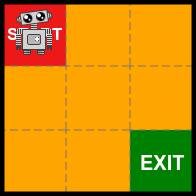

In [10]:
from IPython.display import Image as PyImage
PyImage(filename='drawgrid.gif') 